In [1]:
%pip install pandas 
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
pd.options.display.float_format = '{:,.2f}'.format # Set display options for better readability
flet =pd.read_csv('stanovanja.csv', sep=';')
hise = pd.read_csv('hise.csv', sep=';')

In [4]:
flet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NASLOV     816 non-null    object
 1   CENA       816 non-null    object
 2   OPIS       816 non-null    object
 3   m2         816 non-null    object
 4   LETO       816 non-null    int64 
 5   NASTROPJE  735 non-null    object
 6   ZEMLJISCE  76 non-null     object
dtypes: int64(1), object(6)
memory usage: 44.8+ KB


In [5]:
flet.head(5)

NASLOV          CENA  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA  460.457,99 ‚Ç¨   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA  576.250,99 ‚Ç¨   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA  488.949,30 ‚Ç¨   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA  570.648,89 ‚Ç¨   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA  777.582,99 ‚Ç¨   

                                                OPIS         m2  LETO  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 85...   85,20 m2  2024   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 10...  107,45 m2  2024   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11...  110,40 m2  2024   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11...  112,50 m2  2024   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 16...  162,91 m2  2024   

  NASTROPJE ZEMLJISCE  
0         1       NaN  
1         1       NaN  
2         1       NaN  
3         P       NaN  
4         P       NaN

In [6]:
flet['m2']=flet['m2'].str.replace(',', '.').str.replace(' m2', '').astype(float)

In [7]:
# Clean the CENA column and extract the first valid price
flet['CENA'] = (
	flet['CENA']
	.str.replace('.', '', regex=False)
	.str.replace(',', '.', regex=False)
	.str.replace('‚Ç¨', '', regex=False)
	.str.extract(r'(\d+\.\d+)')[0]  # extract the first float-like number
	.astype(float)
)

In [8]:
flet['cena_m2'] = flet['CENA'] / flet['m2']

In [9]:
flet['adaptirano'] = flet['OPIS'].str.contains('adaptirano', case=False, na=False).astype(int)
# case = False makes the search case-insensitive
# na = False ensures that NaN values are treated as False
#.astype(int) converts the boolean values to integers (0 or 1)

In [10]:
flet['adaptirano'].value_counts()

adaptirano
0    467
1    349
Name: count, dtype: int64

In [11]:
import re

In [12]:
# Extract the year from the description if it exists (when 'adaptirano' is mentioned)
flet['leto_adaptacije'] = flet['OPIS'].str.extract(r'adaptirano.*?(\d{4})', flags=re.IGNORECASE)[0]

In [13]:
flet['leto_adaptacije'].unique()

array([nan, '2025', '2000', '2022', '2018', '2008', '2019', '2002',
       '2010', '2020', '2014', '2016', '2023', '2005', '2015', '2017',
       '1998', '2003', '2011', '2024', '2009', '1977', '2006', '2013',
       '1997', '2007', '2021', '2012', '1994', '2004', '2001', '1995',
       '1990', '1996', '1992'], dtype=object)

In [14]:
flet.to_csv('flet_blink.csv', index=True, sep=';')

In [41]:
flet['st_sob'] = flet['OPIS'].str.extract(r'(\d+)[^\d]{0,10}sobno', flags=re.IGNORECASE)[0].astype(float)

In [42]:
#print(flet[flet['st_sob'].isna()]['OPIS'])


In [43]:
maska_garsonjera = flet['st_sob'].isna() & flet['OPIS'].str.contains('garsonjera', case=False, na=False)
flet.loc[maska_garsonjera, 'st_sob'] = 0.5

In [44]:
flet.loc[224, 'st_sob'] = 0
flet.loc[233, 'st_sob'] = 0
flet.loc[253, 'st_sob'] = 2.0
flet.loc[435, 'st_sob'] = 0
flet.loc[471, 'st_sob'] = 0
flet.loc[576, 'st_sob'] = 18
flet.loc[757, 'st_sob'] = 0

Naredi: preglej vnose stanovanj, ki so bili zgrajeni pred 2000 in NISO adaptirani. Torej groupby SQL

#flet['lokacija'] 
#flet['lokacija_grouped']

In [45]:
#zanka za kraje
kraji = ['≈°i≈°ka', 'viƒç', 'center', 'be≈æigrad', 'moste', 'dravlje', 'tabor', 'ro≈æna dolina', 
         'trnovo', '≈°entvid', 'rudnik', 'zalog', 'ƒçrnuƒçe', 'polje', 'ro≈ænik', 'gameljne', 'golovec', 'trnovo', 'koseze', 
         'kodeljevo', 'brdo', 'vrhovci', 'podutik', 'je≈æica', 'nove jar≈°e', 'btc', 'fu≈æine', '≈°tepanjsko naselje', 'ka≈°elj', 'sostro', 
         '≈°marna gora', 'brinje', 'brod', 'bs 3', 'ƒçrna vas', 'dobrunje', 'dolgi most', 'draveljska gmajna', 'galjevica', 'kolezija', 'litostroj', 
         'medno', 'mirje', 'murglje', 'nadgorica', 'poljane', 'prule', 'rakova jel≈°a', 'savsko naselje', 'stane≈æiƒçe', 'stara lj.', 'sto≈æice', '≈°entjakob', '≈°tepanja vas', 'tacen', 
         'tomaƒçevo', 'tacen', 'tomaƒçevo', 'vi≈æmarje', 'vodmat', 'zelena jama', '≈æale', 'zupanƒçiƒçeva jama', 'murgle', 'rakovnik', 'sneberje']

def extract_kraji(opis):
    for kraj in kraji:
        if kraj in opis.lower():
            return kraj
    else:
        return opis
    
flet['kraj'] = flet['OPIS'].apply(extract_kraji)

AttributeError: 'float' object has no attribute 'lower'

In [46]:
flet['kraj'].unique()

array(['be≈æigrad', 'ƒçrnuƒçe', 'dravlje', 'center', 'moste', '≈°i≈°ka',
       'nove jar≈°e', 'podutik', 'ro≈æna dolina', 'rudnik', 'brdo',
       'brinje', 'brod', 'bs 3', 'btc', 'ƒçrna vas', 'dobrunje',
       'dolgi most', 'draveljska gmajna', 'fu≈æine', 'galjevica', 'je≈æica',
       'kodeljevo', 'kolezija', 'koseze', 'litostroj', 'viƒç', 'medno',
       'mirje', 'murgle', 'trnovo', 'nadgorica', 'poljane', 'polje',
       'prule', 'rakova jel≈°a', 'rakovnik', 'savsko naselje', 'sneberje',
       'gameljne', 'stane≈æiƒçe', 'stara lj.', 'sto≈æice', '≈°entjakob',
       '≈°entvid', '≈°tepanja vas', '≈°tepanjsko naselje', 'tabor', 'tacen',
       'tomaƒçevo', 'vi≈æmarje', 'vodmat', 'zalog', 'zelena jama', 'ka≈°elj',
       'zupanƒçiƒçeva jama', nan], dtype=object)

In [47]:
kraji1 = ['be≈æigrad', 'ƒçrnuƒçe', 'dravlje', 'center', 'moste', '≈°i≈°ka',
       'nove jar≈°e', 'podutik', 'ro≈æna dolina', 'rudnik', 'brdo',
       'brinje', 'brod', 'bs 3', 'btc', 'ƒçrna vas', 'dobrunje',
       'dolgi most', 'draveljska gmajna', 'fu≈æine', 'galjevica', 'je≈æica',
       'kodeljevo', 'kolezija', 'koseze', 'litostroj', 'viƒç', 'medno',
       'mirje', 'murgle', 'trnovo', 'nadgorica', 'poljane', 'polje',
       'prule', 'rakova jel≈°a', 'rakovnik', 'savsko naselje', 'sneberje',
       'gameljne', 'stane≈æiƒçe', 'stara lj.', 'sto≈æice', '≈°entjakob',
       '≈°entvid', '≈°tepanja vas', '≈°tepanjsko naselje', 'tabor', 'tacen',
       'tomaƒçevo', 'vi≈æmarje', 'vodmat', 'zalog', 'zelena jama', 'ka≈°elj',
       'zupanƒçiƒçeva jama']

In [48]:
kraj_to_mestna_cetrt = {
    # Be≈æigrad
    'be≈æigrad': 'Be≈æigrad',
    'brinje': 'Be≈æigrad',
    'je≈æica': 'Posavje',
    'savsko naselje': 'Be≈æigrad',
    'sto≈æice': 'Posavje',
    'tomaƒçevo': 'Posavje',
    'zupanƒçiƒçeva jama': 'Be≈æigrad',

    # Center
    'center': 'Center',
    'mirje': 'Center',
    'poljane': 'Center', 
    'prule': 'Center',
    'ro≈æna dolina': 'Ro≈ænik',
    'stara lj.': 'Center',
    'tabor': 'Center',

    # ƒårnuƒçe
    'ƒçrnuƒçe': 'ƒårnuƒçe',
    'brod': '≈†entvid',
    'nadgorica': 'ƒårnuƒçe',
    '≈°entjakob': '≈†entvid',

    # Dravlje
    'dravlje': 'Dravlje',
    # (ni dodatnih naselij v tvojem seznamu)

    # Jar≈°e
    'nove jar≈°e': 'Jar≈°e',
    'bs 3': 'Jar≈°e',
    'btc': 'Jar≈°e',
    'zelena jama': 'Jar≈°e',
    'jar≈°e': 'Jar≈°e',       # dodano kot splo≈°na referenca

    # Moste
    'moste': 'Moste',
    'fu≈æine': 'Moste',
    'kodeljevo': 'Moste',
    '≈°tepanja vas': 'Golovec',
    '≈°tepanjsko naselje': 'Golovec',
    'vodmat': 'Moste',
    'selo': 'Moste',        # Selo pripada Mostem :contentReference[oaicite:6]{index=6}

    # Polje
    'polje': 'Polje',

    # Posavje
    # (v tvojem seznamu ni naselij, ki spadajo izkljuƒçno sem)

    # Ro≈ænik
    'viƒç': 'Viƒç',
    'brdo': 'Ro≈ænik',
    'dolgi most': 'Viƒç',
    'vrhovce': 'Ro≈ænik',

    # Rudnik
    'rudnik': 'Rudnik',
    'ƒçrna vas': 'Rudnik',
    'galjevica': 'Rudnik',
    'rakova jel≈°a': 'Rudnik',
    'rakovnik': 'Rudnik',

    # Sostro
    'dobrunje': 'Sostro',
    'nadgorica': 'ƒårnuƒçe',
    'ka≈°elj': 'Sostro',
    'sneberje': 'Sostro',
    'zalog': 'Sostro',

    # ≈†entvid
    '≈°entvid': '≈†entvid',
    'medno': '≈†entvid',
    'vi≈æmarje': '≈†entvid',
    'gunclje': '≈†entvid',
    'stane≈æiƒçe': '≈†entvid',

    # ≈†i≈°ka
    '≈°i≈°ka': '≈†i≈°ka',
    'draveljska gmajna': 'Dravlje',
    'koseze': '≈†i≈°ka',
    'litostroj': '≈†i≈°ka',
    'podutik': '≈†i≈°ka',

    # ≈†marna gora
    '≈°marna gora': '≈†marna gora',
    'gameljne': '≈†marna gora',
    'stane≈æiƒçe': '≈†marna gora',
    'tacen': '≈†marna gora',

    # Trnovo
    'trnovo': 'Trnovo',
    'murgle': 'Trnovo',

    # Viƒç
    'kolezija': 'Viƒç',
    'glince': 'Viƒç'
}


In [49]:
flet['mestna_cetrt'] = flet['kraj'].map(kraj_to_mestna_cetrt)


In [50]:
flet.head()

NASLOV       CENA  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 460,457.99   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 576,250.99   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 488,949.30   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 570,648.89   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 777,582.99   

                                                OPIS     m2     LETO  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 85...  85.20 2,024.00   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 10... 107.45 2,024.00   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 110.40 2,024.00   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 112.50 2,024.00   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 16... 162.91 2,024.00   

  NASTROPJE ZEMLJISCE  cena_m2  adaptirano leto_adaptacije  st_sob      kraj  \
0         1       NaN 5,404.44        0.00             NaN    3.00  be≈æigrad   
1         1       NaN 5,362.97        0.00             NaN    4.00  be≈æigrad   
2         1       NaN 4,428.89        0.00             NaN    3.00  be≈æigrad   
3         P       NaN 5,072.43        0.00             NaN    3.00  be≈æigrad   
4         P       NaN 4,773.08        0.00             NaN    4.00  be≈æigrad   

  mestna_cetrt  
0     Be≈æigrad  
1     Be≈æigrad  
2     Be≈æigrad  
3     Be≈æigrad  
4     Be≈æigrad

In [51]:
flet['mestna_cetrt'] = flet['kraj'].map(kraj_to_mestna_cetrt).fillna('Neznano')


In [52]:
flet['mestna_cetrt'].value_counts()


mestna_cetrt
Center         246
Be≈æigrad       124
≈†i≈°ka          105
Viƒç             67
Moste           52
Ro≈ænik          37
Rudnik          29
≈†entvid         28
Jar≈°e           24
Dravlje         21
ƒårnuƒçe          19
Posavje         19
Trnovo          13
≈†marna gora     10
Sostro           9
Polje            7
Golovec          5
Neznano          1
Name: count, dtype: int64

In [53]:
#flet['kraj'].value_counts()

In [54]:
flet.info()


<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 576
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NASLOV           815 non-null    object 
 1   CENA             815 non-null    float64
 2   OPIS             815 non-null    object 
 3   m2               815 non-null    float64
 4   LETO             815 non-null    float64
 5   NASTROPJE        734 non-null    object 
 6   ZEMLJISCE        76 non-null     object 
 7   cena_m2          815 non-null    float64
 8   adaptirano       815 non-null    float64
 9   leto_adaptacije  346 non-null    object 
 10  st_sob           816 non-null    float64
 11  kraj             815 non-null    object 
 12  mestna_cetrt     816 non-null    object 
dtypes: float64(6), object(7)
memory usage: 121.5+ KB


Korekcija tipov podatkov:


In [55]:
pd.set_option('display.max_rows', None)

In [56]:
flet['adaptirano'].value_counts()

adaptirano
0.00    467
1.00    348
Name: count, dtype: int64

In [57]:
flet = flet.drop(576)

Komentar: nadstropja? ali so pomembna? 
V primeru zemlji≈°ƒç... ali tovrstna stanovanje izloƒçimo?


In [58]:
flet['st_sob'].value_counts().sum()

np.int64(815)

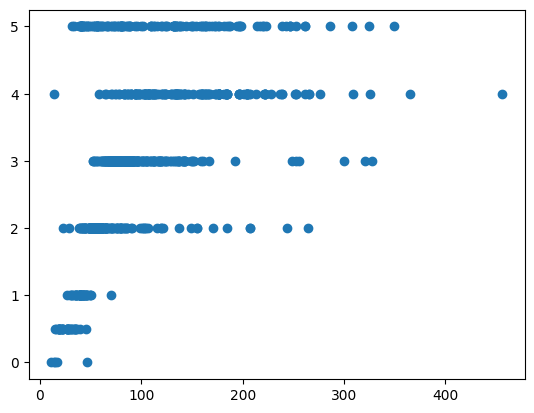

In [59]:
# Drop rows with missing values in 'm2' or 'st_sob' before plotting
flet_clean = flet.dropna(subset=['m2', 'st_sob'])
plt.scatter(data=flet_clean, x='m2', y='st_sob')

In [60]:
sobnost = flet.groupby('st_sob')['m2'].mean()

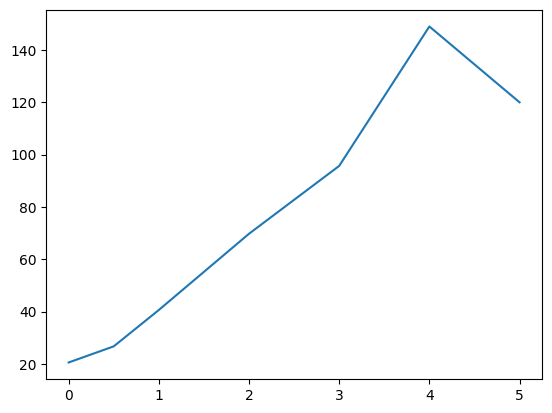

In [61]:
plt.plot(sobnost)

In [62]:
#prikaz stanovanj, ki imajo pripradajoƒçe zemlji≈°ƒçe. Stanovanja, ki nimajo zemlji≈°ƒça so bila 'NaN'.
zemljisce = flet[flet['ZEMLJISCE'].notna()]
zemljisce

NASLOV       CENA  \
5                ƒåRNUƒåE, NARAVA ZASEBNOST TEHNOLOGIJA 489,000.00   
37           BRDO, 3 - SOBNO, ATRIJSKO, NADSTANDARDNO 678,742.32   
38                       BRDO, ATRIJSKO, TOP LOKACIJA 595,469.76   
50                            BROD, MARINOV≈†EVA CESTA 535,205.89   
54                                               BS 3 168,600.00   
58                                               BS 3 360,000.00   
60                                           ƒåRNA VAS 530,000.00   
68                                             ƒåRNUƒåE 190,000.00   
69                                             ƒåRNUƒåE 280,000.00   
70                                             ƒåRNUƒåE 495,000.00   
73                                             ƒåRNUƒåE 585,000.00   
74                                             ƒåRNUƒåE 650,000.00   
75               ƒåRNUƒåE, NARAVA ZASEBNOST TEHNOLOGIJA 489,000.00   
79                                         DOLGI MOST 435,000.00   
127                                         KODELJEVO 265,000.00   
130                                          KOLEZIJA 385,000.00   
139                                      LJ. BE≈ΩIGRAD 141,000.00   
156                                      LJ. BE≈ΩIGRAD 311,000.00   
175                                      LJ. BE≈ΩIGRAD 469,000.00   
196                      LJ. BE≈ΩIGRAD, ƒåERINOVA ULICA 397,600.00   
207                 LJ. BE≈ΩIGRAD, KAMNI≈†KA ULICA /VRT 141,000.00   
215                             LJ. BE≈ΩIGRAD, STO≈ΩICE 305,000.00   
254                                        LJ. CENTER 387,000.00   
273                                        LJ. CENTER 499,000.00   
279                                        LJ. CENTER 499,000.00   
280                                        LJ. CENTER 499,000.00   
345                                        LJ. CENTER 550,000.00   
381                            LJ. CENTER, GORNJI TRG 590,000.00   
382                            LJ. CENTER, GORNJI TRG 590,000.00   
391                        LJ. CENTER, MESARSKA CESTA 210,000.00   
417                          LJ. CENTER, SLOM≈†KOVA 11  84,900.00   
426                             LJ. CENTER, STARI TRG 700,000.00   
431                                LJ. CENTER, TRNOVO 395,000.00   
444                                         LJ. MOSTE 220,000.00   
445                                         LJ. MOSTE 260,000.00   
447                                         LJ. MOSTE 330,000.00   
450                                         LJ. MOSTE 399,000.00   
452                                         LJ. MOSTE 300,000.00   
453                                         LJ. MOSTE 595,000.00   
455                          LJ. MOSTE, ATRIJ, TERASA 379,900.00   
456                    LJ. MOSTE, ATRIJSKO STANOVANJE 400,000.00   
458                             LJ. MOSTE, NOVE JAR≈†E 379,900.00   
462                             LJ. MOSTE, ≈†MARTINSKA 334,000.00   
463                 LJ. MOSTE, V DVOSTANOVANJSKI HI≈†I 270,000.00   
466                      LJ. MOSTE, ZAKOTNIKOVA ULICA 325,000.00   
469                             LJ. MOSTE, ZALO≈†KA 26 236,000.00   
480                                         LJ. ≈†I≈†KA 207,000.00   
508                                         LJ. ≈†I≈†KA 290,000.00   
525                                 LJ. ≈†I≈†KA, KOSEZE 350,000.00   
584                             LJ. VIƒå, RO≈ΩNA DOLINA 699,000.00   
614                    NOVE JAR≈†E, POLEG O≈†, S TERASO 379,900.00   
625                                             POLJE 188,000.00   
633                                             PRULE 550,000.00   
639                                      RAKOVA JEL≈†A 250,000.00   
640                              RAKOVA JEL≈†A, TRNOVO 330,000.00   
656                                      RO≈ΩNA DOLINA 719,000.00   
664     RO≈ΩNA DOLINA, 1KM CENTER, 300M RO≈ΩNIK, TIVOLI 329,000.00   
666  RO≈ΩNA DOLINA, ATRIJSKO, 3 - SOBNO, NADSTANDARDNO 678

Stanovanja z pripradajoƒçimi zemlji≈°ƒçi so v veliki veƒçini atipiƒçna. Zato jih je potrebno loƒçiti na tipiƒçna stanovanja (brez zemlji≈°ƒça) in atipiƒçna (s pripadajoƒçimi vrtovi in atriji).

Loƒçimo ≈°e stanovanja, ki so adaptirana in tista ki niso, ter naredimo nov stolpec o sobnosti. Nekatera stanovanja so veliko premajhna za 4 sobnost itd.

In [63]:
flet['sobnost_ocenjena'] = flet['m2']

In [64]:
fleti = pd.DataFrame(flet)


In [65]:
fleti.head()

NASLOV       CENA  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 460,457.99   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 576,250.99   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 488,949.30   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 570,648.89   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 777,582.99   

                                                OPIS     m2     LETO  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 85...  85.20 2,024.00   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 10... 107.45 2,024.00   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 110.40 2,024.00   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 112.50 2,024.00   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 16... 162.91 2,024.00   

  NASTROPJE ZEMLJISCE  cena_m2  adaptirano leto_adaptacije  st_sob      kraj  \
0         1       NaN 5,404.44        0.00             NaN    3.00  be≈æigrad   
1         1       NaN 5,362.97        0.00             NaN    4.00  be≈æigrad   
2         1       NaN 4,428.89        0.00             NaN    3.00  be≈æigrad   
3         P       NaN 5,072.43        0.00             NaN    3.00  be≈æigrad   
4         P       NaN 4,773.08        0.00             NaN    4.00  be≈æigrad   

  mestna_cetrt  sobnost_ocenjena  
0     Be≈æigrad             85.20  
1     Be≈æigrad            107.45  
2     Be≈æigrad            110.40  
3     Be≈æigrad            112.50  
4     Be≈æigrad            162.91

üìö Osnova za lestvico sobnosti po kvadraturi, ki sem ti jo predlagal, izhaja iz kombinacije:
Slovenskih standardov in zakonodaje (minimalni standardi):

Pravilnik o minimalnih tehniƒçnih zahtevah za stanovanja navaja, da mora imeti enosobno stanovanje vsaj 28‚Äì30 m¬≤, dvosobno pa vsaj 45 m¬≤.

Standardna otro≈°ka soba ~8‚Äì10 m¬≤, spalnica ~12‚Äì14 m¬≤, dnevna soba ~18‚Äì25 m¬≤, kopalnica ~5 m¬≤, kuhinja 6‚Äì8 m¬≤.

Splo≈°nih urbanistiƒçnih norm (in prakse nepremiƒçninskih agencij):

V praksi se 2-sobna stanovanja gibljejo med 45‚Äì60 m¬≤, 3-sobna med 60‚Äì75 m¬≤, itd.

5-sobno stanovanje z 100 m¬≤ pomeni, da je vsaka soba mikro enota.

Logike dejanske uporabnosti prostora:

Povr≈°ina stanovanja mora sorazmerno rasti s ≈°tevilom uporabnih sob. ƒåe ima 100 m¬≤ 5 sob, pomeni da so pod-standardno velike ali da nimajo loƒçenih prostorov (npr. hodnika, utilitya, shramb ipd.).

| Kvadratura (m¬≤) | Ocenjena sobnost |
| --------------- | ---------------- |
| < 35            | 1                |
| 35‚Äì50           | 2                |
| 51‚Äì70           | 3                |
| 71‚Äì90           | 4                |
| 91‚Äì110          | 5                |
| > 110           | 6+               |


In [66]:
def oceni_sobnost(m2):
    if pd.isna(m2):
        return None
    if m2 < 35:
        return 1
    elif m2 < 50:
        return 2
    elif m2 < 70:
        return 3
    elif m2 < 90:
        return 4
    elif m2 < 110:
        return 5
    else:
        return 6



In [71]:
fleti['sobnost_ocenjena'] = fleti['m2'].apply(oceni_sobnost)


In [72]:
fleti[['OPIS','st_sob', 'sobnost_ocenjena']].dropna().sample(10) # primerjava ogla≈°evane sobnosti z ocenjeno.


OPIS  st_sob  \
202  LJ. BE≈ΩIGRAD, FUNKCINALNO, ƒåUDOVIT RAZGLED, 42...    1.00   
330  LJ. CENTER, 184,4 m2, 4-sobno, zgrajeno l. 200...    4.00   
677  RUDNIK, 143,4 m2, 4-sobno, zgrajeno l. 2015, p...    4.00   
408  LJ. CENTER, POLJANSKA CESTA 9, 18,7 m2, garson...    0.50   
397  LJ. CENTER, MIKLO≈†IƒåEVA CESTA, 239 m2, 4-sobno...    4.00   
135  LITOSTROJ, 78,5 m2, 2-sobno, zgrajeno l. 1952,...    2.00   
698  SP. ≈†I≈†KA, 56,4 m2, 2,5-sobno, zgrajeno l. 200...    5.00   
747  ≈†ENTVID, 88,7 m2, 3-sobno, zgrajeno l. 1986, a...    3.00   
30   BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 13...    3.00   
784  ZALOG, 64 m2, 4-sobno, zgrajeno l. 1997, adapt...    4.00   

     sobnost_ocenjena  
202                 2  
330                 6  
677                 6  
408                 1  
397                 6  
135                 4  
698                 3  
747                 4  
30                  6  
784                 3

In [74]:
fleti.to_csv('fleti_cleaned', index=False)

In [75]:
fleti.head()

NASLOV       CENA  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 460,457.99   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 576,250.99   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 488,949.30   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 570,648.89   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA 777,582.99   

                                                OPIS     m2     LETO  \
0  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 85...  85.20 2,024.00   
1  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 10... 107.45 2,024.00   
2  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 110.40 2,024.00   
3  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 11... 112.50 2,024.00   
4  BE≈ΩIGRAJSKI DVOR, BE≈ΩIGRAD, ƒåERINOVA ULICA, 16... 162.91 2,024.00   

  NASTROPJE ZEMLJISCE  cena_m2  adaptirano leto_adaptacije  st_sob      kraj  \
0         1       NaN 5,404.44        0.00             NaN    3.00  be≈æigrad   
1         1       NaN 5,362.97        0.00             NaN    4.00  be≈æigrad   
2         1       NaN 4,428.89        0.00             NaN    3.00  be≈æigrad   
3         P       NaN 5,072.43        0.00             NaN    3.00  be≈æigrad   
4         P       NaN 4,773.08        0.00             NaN    4.00  be≈æigrad   

  mestna_cetrt  sobnost_ocenjena  
0     Be≈æigrad                 4  
1     Be≈æigrad                 5  
2     Be≈æigrad                 6  
3     Be≈æigrad                 6  
4     Be≈æigrad                 6

In [79]:
fleti.to_csv('fleti.csv', sep=';', index=False, encoding='utf-8')
